# Statistical estimation of clear sky signal using SVD

In [1]:
from core.preprocessing import StatisticalClearSky
import numpy as np
import pandas as pd
df = pd.read_pickle('data/master_dataset.pkl').fillna(0)
df = df.loc['2015-07-15':'2017-07-14']
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')

We isolate a single AC power single for a single inverter to performance clear sky estimation on.

In [2]:
scs = StatisticalClearSky(df['S47'])

This method utilizes SVD decomposition to generate eigenvectors representing 24 hours of 5-minute data.

In [3]:
%time scs.get_eigenvectors()

CPU times: user 83.6 ms, sys: 63 ms, total: 147 ms
Wall time: 85.5 ms


Individual days from the dataset can be reconstructed via the solar eigenvectors. Using the eigenvectors associated with the largest 100 eigenvalues, almost no information about the original signal is lost

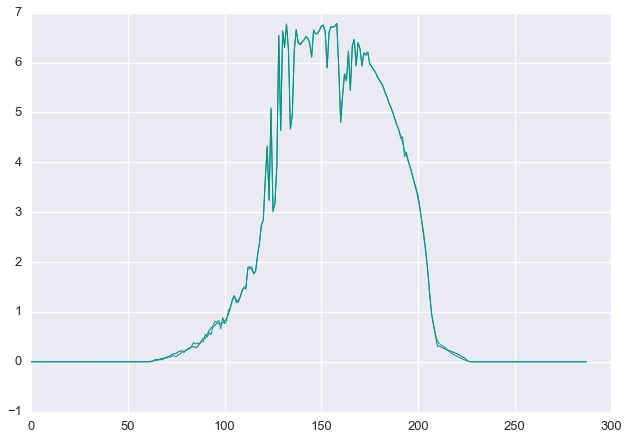

In [4]:
scs.reconstruct_day(day=327, n=100)

Using a smaller number of eigenvector creates smoothing.

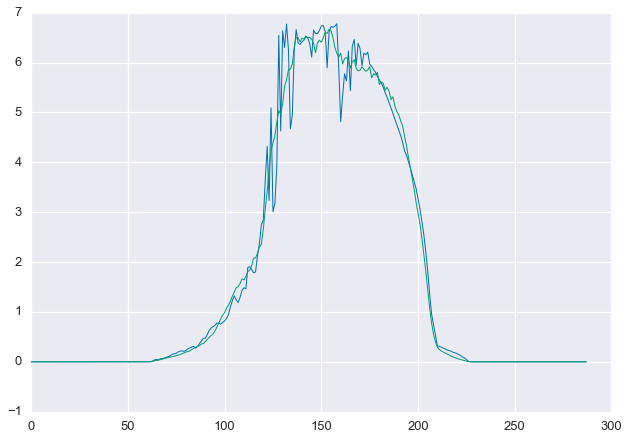

In [5]:
scs.reconstruct_day(day=327, n=5)

Clear sky estimation is performed via estimating new values for the scale factors on the first three eigenvectors. More explanation will be given in the future. A view of the fits is given below.

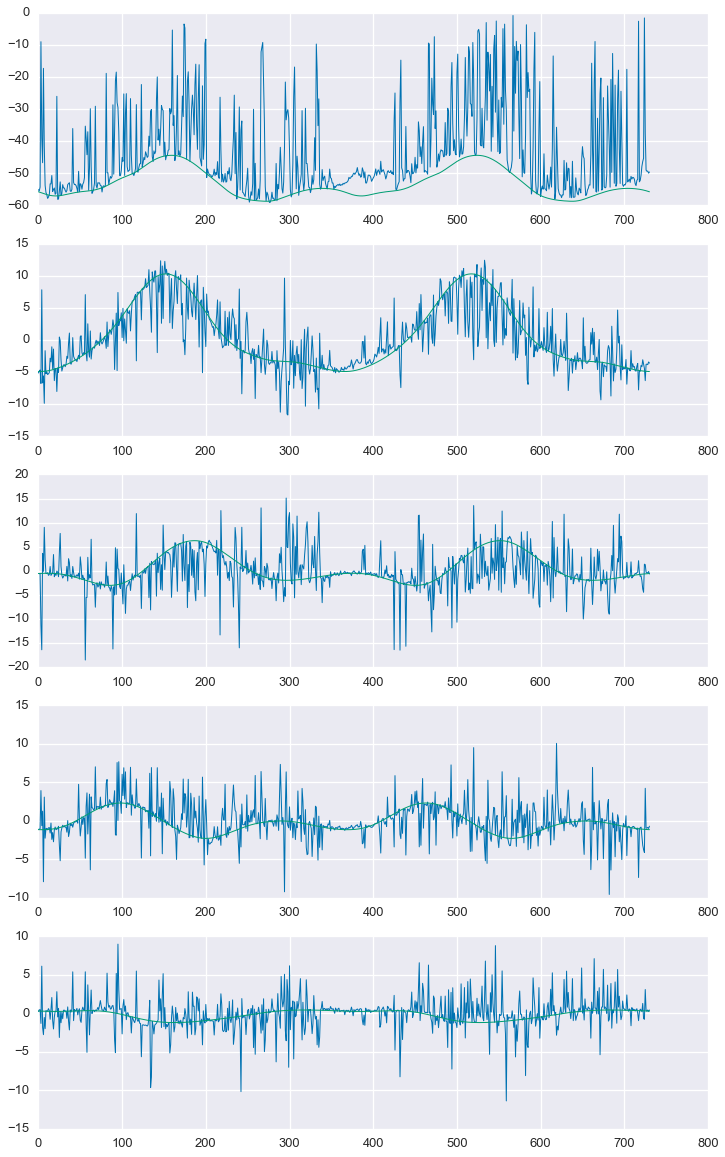

In [6]:
_ = scs.make_clearsky_model(n=5, plot=True)

We can access the clearsky model as a method on this class. Below we compare a sunny day with it's low-dimensionality reconstruction and the clear sky model.

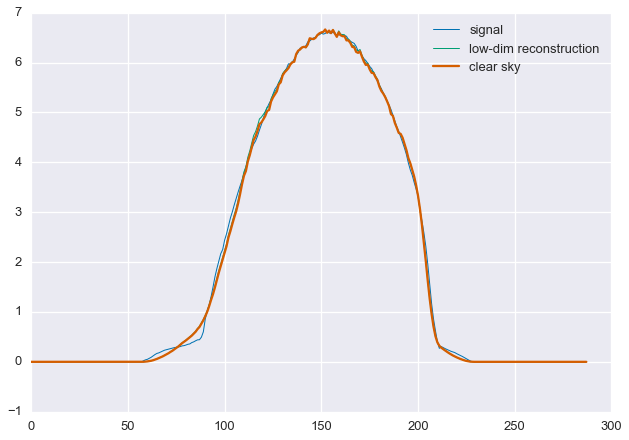

In [7]:
DAY = 337
scs.reconstruct_day(DAY, n=5)
estimates = scs.estimate_clearsky(np.s_[DAY:DAY+1])
for i in xrange(estimates.shape[1]):
    plt.plot(estimates[:, i])
plt.legend(['signal', 'low-dim reconstruction', 'clear sky'])

Here is a similar comparison on a cloudy day.

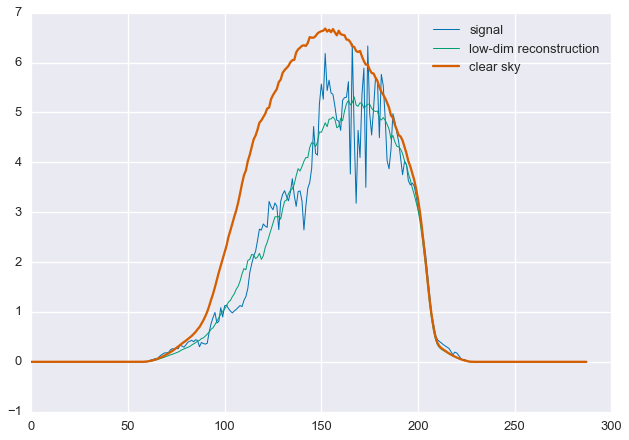

In [8]:
DAY = 330
scs.reconstruct_day(DAY, n=5)
estimates = scs.estimate_clearsky(np.s_[DAY:DAY+1])
for i in xrange(estimates.shape[1]):
    plt.plot(estimates[:, i])
plt.legend(['signal', 'low-dim reconstruction', 'clear sky'])